<a href="https://colab.research.google.com/github/acts701/Audio/blob/main/241028_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 변수의 shape, type, value 확인
def p(var,_name="") :
    if _name != "" : print(f'<<{_name}>>')
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}')

In [ ]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,3]
plt.rcParams['font.size'] = '8'

keras.__version__

'3.4.1'

In [ ]:
level_of_noise = 0.7

In [ ]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train/255, x_test/255
x_train_f = x_train.reshape(-1, 28*28)
x_test_f = x_test.reshape(-1, 28*28)

noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_train_f.shape))
x_train_f_n = x_train_f + noise
x_train_f_n = np.clip(x_train_f_n, 0, 1)

noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_test_f.shape))
x_test_f_n = x_test_f + noise
x_test_f_n = np.clip(x_test_f_n, 0, 1)

# plt.imshow(x_trainNoise[0].reshape(28,28))
# pst(x_train) Shape(60000, 28, 28)
# pst(y_train) Shape(60000,)
# pst(x_test) Shape(10000, 28, 28),
# pst(y_test) Shape(10000,)
# pst(noise) Shape(10000, 784)
# pst(x_trainNoise) Shape(60000, 784)
# print(y_train[0])
# plt.imshow(x_train[0].reshape(28,28))
# pst(x_train2D) ape(60000, 784)

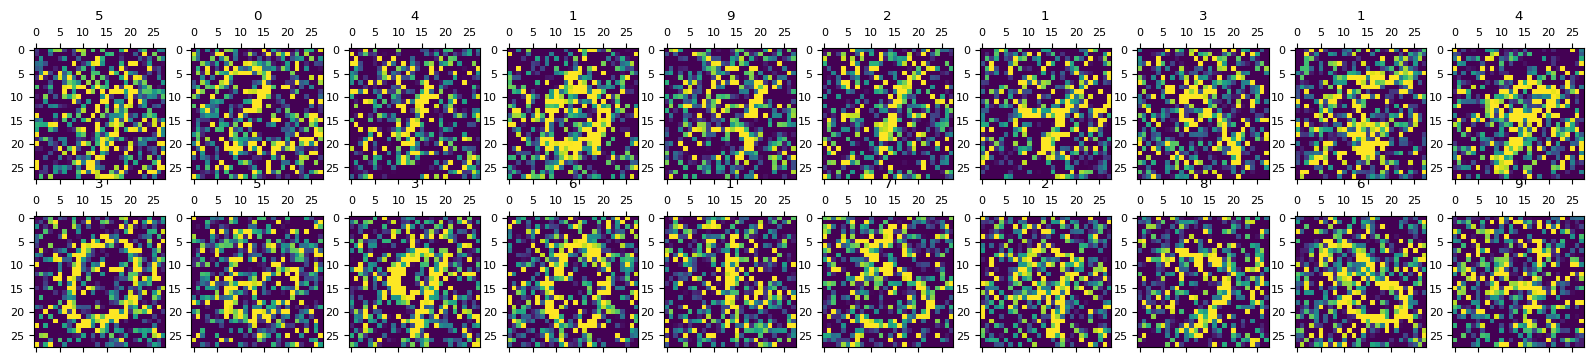

In [ ]:
# fig, axs = plt.subplots(2, 10, sharey=False, tight_layout=True, figsize=(20,4), facecolor='white')
fig, axs = plt.subplots(2, 10, figsize=(20,4))

n = 0
for i in range(0,2):
    for j in range(0,10):
        axs[i,j].matshow(x_test_f_n[n].reshape(28,28))
        axs[i,j].set(title = y_train[n])
        n=n+1
plt.show()

In [ ]:
def f_ModelAcc():
    modelAcc = keras.models.Sequential([
        keras.Input(shape=[28,28,1]),
        layers.Conv2D(128, 3, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(2,2),
        layers.Conv2D(256,3,padding='same'),
        layers.Activation('relu'),
        layers.MaxPool2D(2,2),
        layers.Conv2D(128,3,padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Flatten(name='flatten'),
        layers.Dense(10, activation='softmax')
    ])
    modelAcc.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy', metrics=['acc'])
    return modelAcc

In [ ]:
modelAcc = f_ModelAcc()
history = modelAcc.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - acc: 0.9193 - loss: 0.2740 - val_acc: 0.9526 - val_loss: 0.2533
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9897 - loss: 0.0340 - val_acc: 0.9891 - val_loss: 0.0327
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9929 - loss: 0.0215 - val_acc: 0.9862 - val_loss: 0.0432
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - acc: 0.9946 - loss: 0.0163 - val_acc: 0.9896 - val_loss: 0.0327
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - acc: 0.9956 - loss: 0.0134 - val_acc: 0.9930 - val_loss: 0.0241


In [ ]:
x_train_n_2D = x_train_f_n.reshape(-1,28,28)
x_test_n_2D = x_test_f_n.reshape(-1,28,28)

modelNoise = f_ModelAcc()
historyNoise = modelNoise.fit(x_train_n_2D, y_train, batch_size=128, epochs=5, validation_data=(x_test_n_2D, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - acc: 0.7698 - loss: 0.7252 - val_acc: 0.9018 - val_loss: 0.3861
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9251 - loss: 0.2323 - val_acc: 0.9081 - val_loss: 0.2704
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9404 - loss: 0.1831 - val_acc: 0.9247 - val_loss: 0.2301
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9537 - loss: 0.1429 - val_acc: 0.8980 - val_loss: 0.3130
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9653 - loss: 0.1086 - val_acc: 0.9252 - val_loss: 0.2381


In [ ]:
_, acc = modelAcc.evaluate(x_test, y_test)
print(f'normal train, normal test = {acc*100:.3f}%')
_, acc = modelAcc.evaluate(x_test_n_2D, y_test)
print(f'normal train, noisy test = {acc*100:.3f}%')
_, acc = modelNoise.evaluate(x_test, y_test)
print(f'noisy train, normal input = {acc*100:.3f}%')
_, acc = modelNoise.evaluate(x_test_n_2D, y_test)
print(f'noisy train, noisy test = {acc*100:.3f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9916 - loss: 0.0296
normal train, normal test = 99.300%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.0941 - loss: 20.3708
normal train, noisy test = 9.740%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9763 - loss: 0.0957
noisy train, normal input = 98.090%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9104 - loss: 0.2934
noisy train, noisy test = 92.520%


In [ ]:
latentDim = 10

In [ ]:

from keras.constraints import max_norm

def AE():
    input = layers.Input(shape=(784,))
    x = layers.Dense(128, activation='relu', kernel_constraint=max_norm(2.))(input)
    x = layers.Dense(64, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(latentDim, activation='linear', kernel_constraint=max_norm(2.),name='enc')(x)

    x = layers.Dense(32, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(128, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(784, activation='sigmoid', kernel_constraint=max_norm(2.),name='dec')(x)
    return keras.Model(input, x)

model = AE()
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ enc (Dense)                          │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dec (Dense)                          │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,098 (840.23 KB)

 Trainable params: 215,098 (840.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=50
batchsize=512
model = AE()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [ ]:
result1 = model.fit(x_train_f_n, x_train_f_n, epochs=epochs, batch_size=batchsize, validation_data=(x_test_f_n, x_test_f_n))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1481 - val_loss: 0.1351
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1339 - val_loss: 0.1313
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1309 - val_loss: 0.1299
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1297 - val_loss: 0.1290
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1288 - val_loss: 0.1285
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1283 - val_loss: 0.1282
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1281 - val_loss: 0.1281
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1279 - val_loss: 0.1280
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1277 - val_loss: 0.1277
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1276 - val_loss: 0.1275
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1275 - val_loss: 0.1274
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

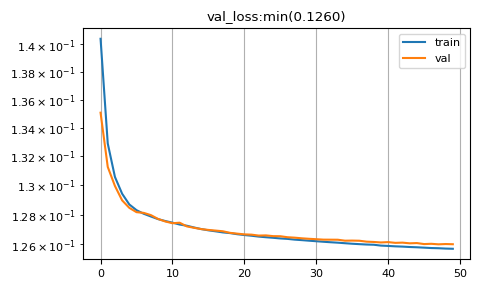

In [ ]:
hist = result1.history
plt.title(f"val_loss:min({min(hist['val_loss']):0.4f})")
plt.plot(hist['loss'], label='train')
plt.plot(hist['val_loss'], label='val')
plt.semilogy()
plt.grid()
plt.legend()
plt.show()

In [ ]:
decoded_imgs = []
decoded_imgs.append(model.predict(x_test_f_n[0:20]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


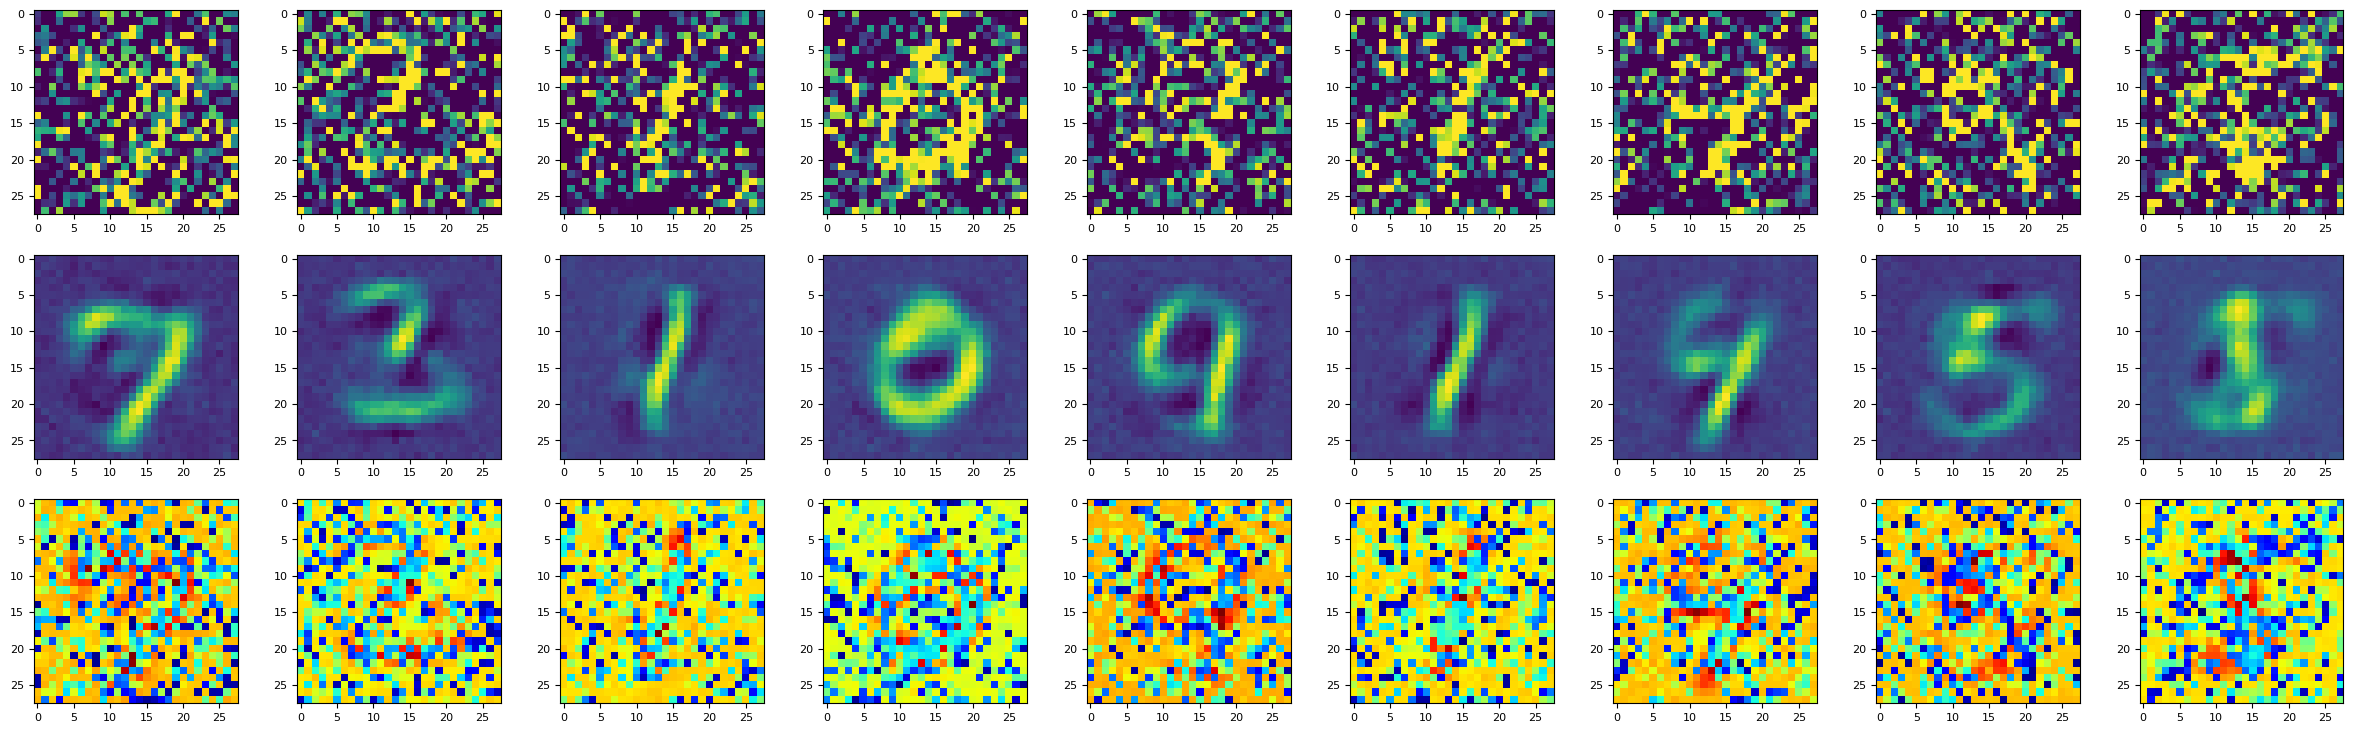

In [ ]:
num_imgs=9
n_row=3

plt.figure(figsize=(30,9))
for i in range(n_row):
    for j in range(num_imgs):
        if 0 == i:
            plt.subplot(n_row, num_imgs, j+1)
            pltImg = x_test_f_n[j].reshape(28,28)
            plt.imshow(pltImg)
        if 1 == i:
            plt.subplot(n_row, num_imgs, num_imgs+j+1)
            pltImg = decoded_img[0][j].reshape(28,28)
            plt.imshow(pltImg)
        else:
            plt.subplot(n_row, num_imgs, 2*num_imgs+j+1)
            pltImg = (decoded_img[0][j]-x_test_f_n[j]).reshape(28,28)
            plt.imshow(pltImg, cmap='jet')
plt.show()

In [ ]:
decoded_imgs_p = model.predict(x_test_f_n)
decoded_imgs = decoded_imgs_p.reshape(-1,28,28)

_, acc = modelAcc.evaluate(x_test, y_test)
print(f"normal train normal input : {acc*100:.3f}%")
_, acc = modelAcc.evaluate(x_test_n_2D, y_test)
print(f"normal train noisy input : {acc*100:.3f}%")
_, acc = modelAcc.evaluate(decoded_imgs, y_test)
print(f"normal train decoded input : {acc*100:.3f}%")

_, acc = modelNoise.evaluate(x_test, y_test)
print(f"noise train normal input : {acc*100:.3f}%")
_, acc = modelNoise.evaluate(x_test_n_2D, y_test)
print(f"noise train noise input : {acc*100:.3f}%")
_, acc = modelNoise.evaluate(decoded_imgs, y_test)
print(f"noise train decoded input : {acc*100:.3f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9916 - loss: 0.0296
normal train normal input : 99.300%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.0941 - loss: 20.3708
normal train noisy input : 9.740%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4186 - loss: 1.9029
normal train decoded input : 43.380%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9763 - loss: 0.0957
noise train normal input : 98.090%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9104 - loss: 0.2934
noise train noise input : 92.520%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7494 - loss: 0.7774
noise train decoded input : 76.570%


In [ ]:
level_of_bias = 0.3
level_of_noise = 0.2

[] Shape(60000, 784)


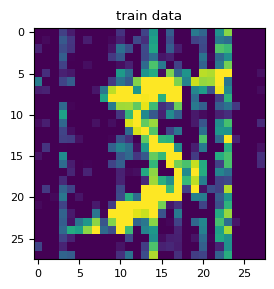

In [ ]:

biasNoise = level_of_bias * np.random.normal(loc=0.0, scale=1.0, size=(x_train.shape[0], 28))
biasNoiseExpanded = np.tile(biasNoise, (1,28))
x_train_n = x_train_f + biasNoiseExpanded
noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_train_f.shape))
x_train_n = x_train_n + noise
x_train_n = np.clip(x_train_n, 0, 1)

ps(x_train_n)
plt.title('train data')
plt.imshow(x_train_n[0].reshape(28,28))
plt.show()